In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
data = pd.read_csv('loan_approval_dataset.csv')
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## checking the size of the data set 

In [4]:
data.shape

(4269, 13)

In [7]:
data.columns


Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

## Removing the unnecessary loan_id as it is an identifier column

In [8]:
data.drop(columns = 'loan_id',inplace = True)

In [9]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## Checking null values 

In [10]:
data.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [11]:
#Checking the data type of the columns
data.dtypes

 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [12]:
data.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Exploratory Data Analysis

In the exploratory data analysis, I will be looking at the distribution of the data across the varaiables, followed by relationship between the independent and target variable and the correlation among the variables. Through the visualization, I will be able to understand the possible trends and patterns in the data and come to know about the hidden insights of the data.

### Number of Dependents

Text(0.5, 1.0, 'Number of Dependents')

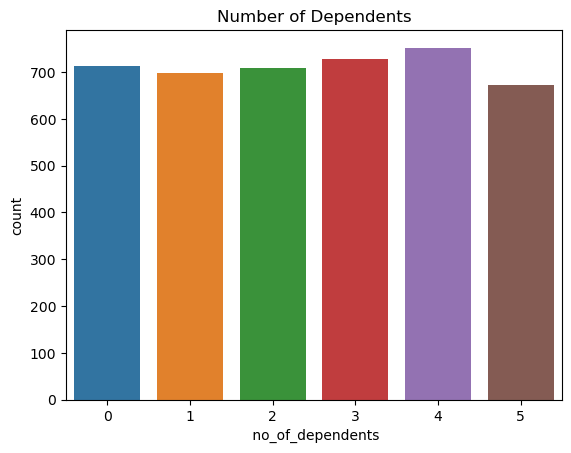

In [14]:
sns.countplot(x = ' no_of_dependents', data = data).set_title('Number of Dependents')

This graph shows the number of dependent indivduals on the loan applicant. There is not much difference in the number of dependents, however, there are more applicants with 4 and 3 dependents than the other categories. Since the number of dependents increases the disposable income of the applicant decreases. So I assume that that the number of applicants with 0 or 1 dependent will have higher chances of loan approval.

## Education and Income

<AxesSubplot:xlabel=' education', ylabel=' income_annum'>

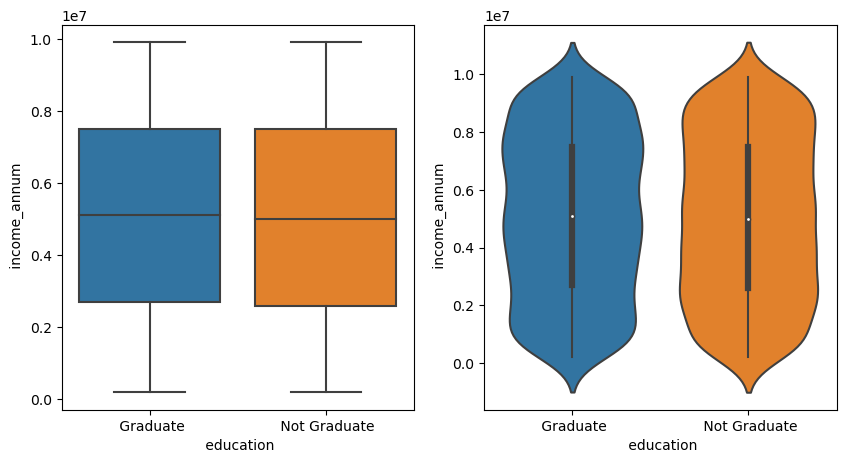

In [17]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = data, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = data, ax=ax[1])

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

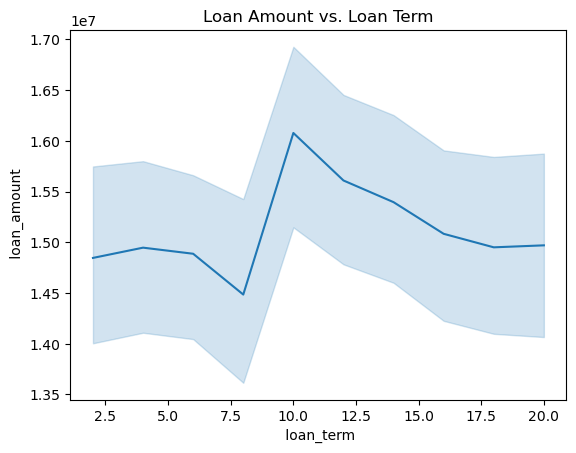

In [19]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = data).set_title('Loan Amount vs. Loan Term')

## Employment Status and Education

Text(0.5, 1.0, 'Self Employed')

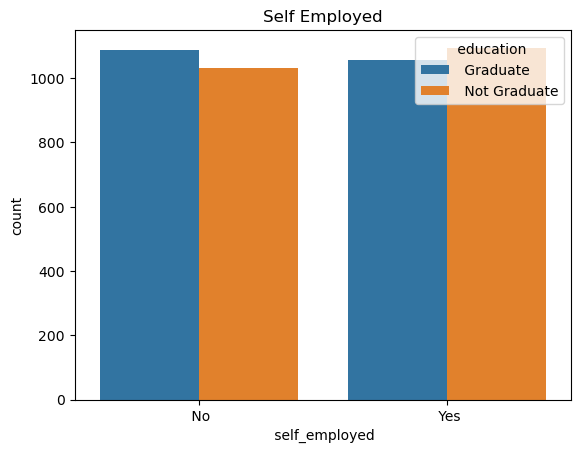

In [20]:
sns.countplot(x=' self_employed', data = data, hue = ' education').set_title('Self Employed')

## CIBIL Score Distribution

<AxesSubplot:xlabel=' cibil_score', ylabel='Count'>

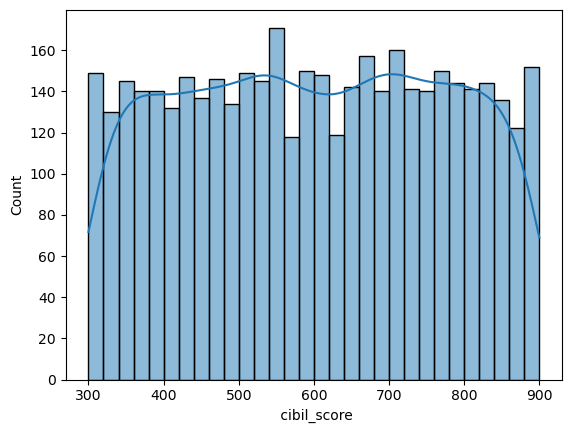

In [21]:
sns.histplot(data[' cibil_score'], bins = 30, kde = True,)

In [23]:
# Label Encoding
data[' education'] = data[' education'].map({' Not Graduate':0, ' Graduate':1})
data[' self_employed'] = data[' self_employed'].map({' No':0, ' Yes':1})
data[' loan_status'] = data[' loan_status'].map({' Rejected':0, ' Approved':1})

In [24]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


<AxesSubplot:>

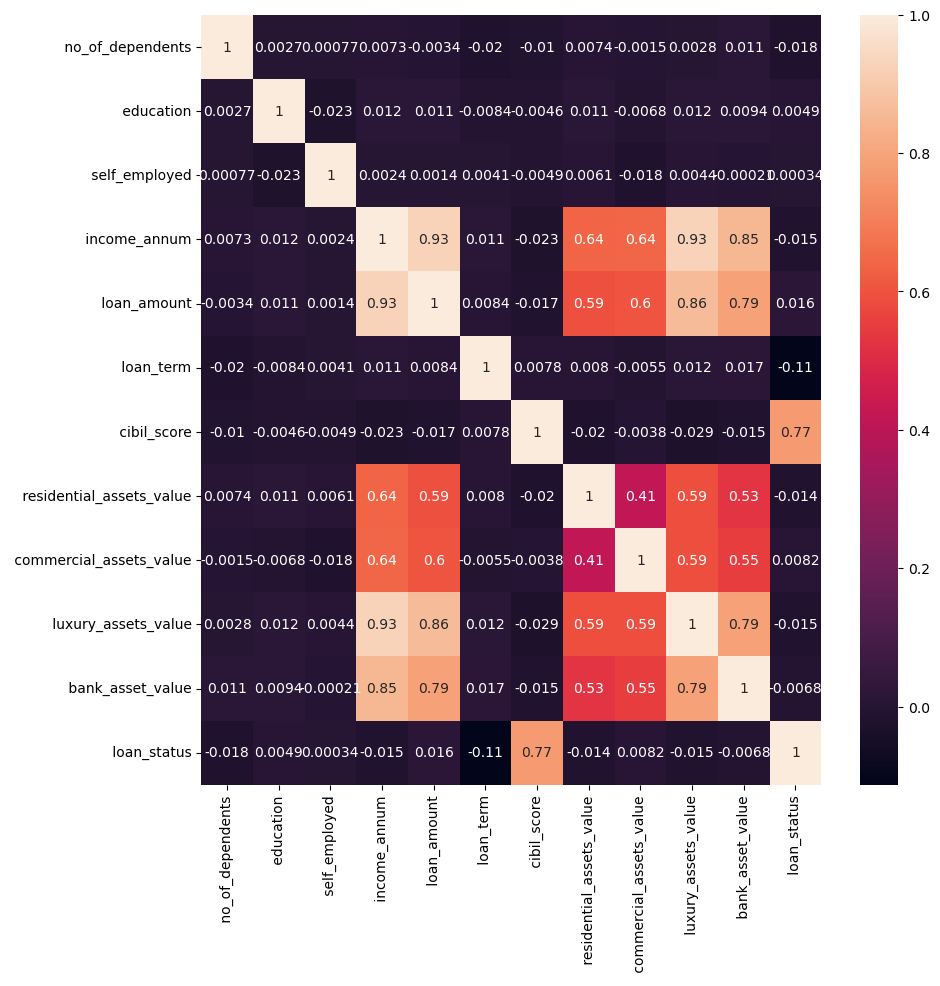

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot = True)

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(' loan_status', axis=1), data[' loan_status'], test_size=0.2, random_state=42)

## Model Building
### I will be using the following machine learning models to predcit the loan approval status:

- Decision Tree Classifier
- Random Forest Classifier

## Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [32]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
# Training Accuracy
dtree.score(X_train, y_train)

1.0

In [34]:
# Predicting the Loan Approval Status
dtree_pred = dtree.predict(X_test)

## Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [36]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
# Training Accuracy
rfc.score(X_train, y_train)

1.0

In [38]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

## Model Evalution

#### Confusion Matrix

Text(518.4494949494949, 0.5, 'Actual')

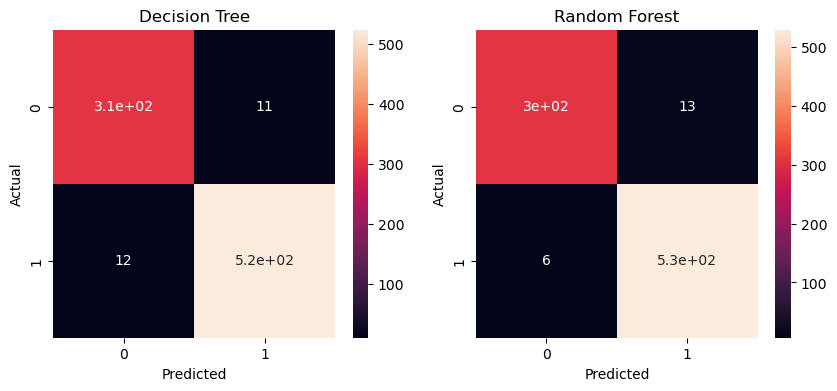

In [39]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

## Distribution Plot

Text(0.5, 1.0, 'Actual vs Fitted Values for Decsion Tree Classfier')

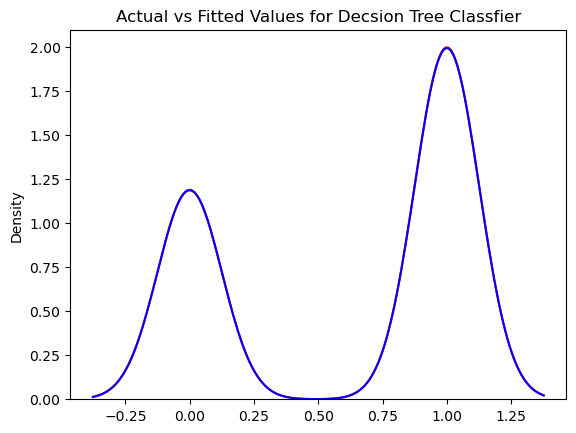

In [40]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = dtree_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Decsion Tree Classfier')

## Classification Report

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       318
           1       0.98      0.98      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))

R2 score:  0.8847625082136487
Mean Squared Error:  0.026932084309133488
Mean Absolute Error:  0.026932084309133488


R2 score:  0.9048038111330141
Mean Squared Error:  0.02224824355971897
Mean Absolute Error:  0.02224824355971897
